# Etapa1

In [1]:
# Importar bibliotecas necesarias
import os
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

# Ruta al dataset descargado
dataset_path = "Garbage classification" 

# 1. Cargar el dataset y explorar carpetas
def explorar_dataset(path):
    clases = os.listdir(path)
    print(f"Clases disponibles: {clases}")
    total_imagenes = 0
    distribucion = {}
    for clase in clases:
        clase_path = os.path.join(path, clase)
        imagenes = os.listdir(clase_path)
        distribucion[clase] = len(imagenes)
        total_imagenes += len(imagenes)
    print(f"Total de imágenes: {total_imagenes}")
    return distribucion

distribucion = explorar_dataset(dataset_path)

Clases disponibles: ['trash', 'cardboard', 'plastic', 'metal', 'paper', 'glass']
Total de imágenes: 3564


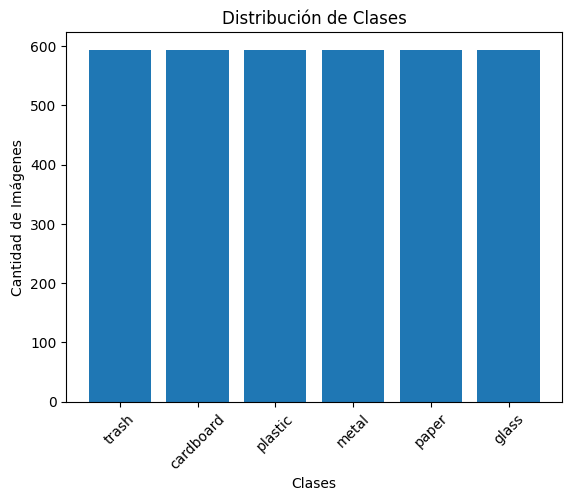

In [2]:
# 2. Visualizar la distribución de clases
def visualizar_distribucion(distribucion):
    clases, cantidades = zip(*distribucion.items())
    plt.bar(clases, cantidades)
    plt.xlabel('Clases')
    plt.ylabel('Cantidad de Imágenes')
    plt.title('Distribución de Clases')
    plt.xticks(rotation=45)
    plt.show()

visualizar_distribucion(distribucion)

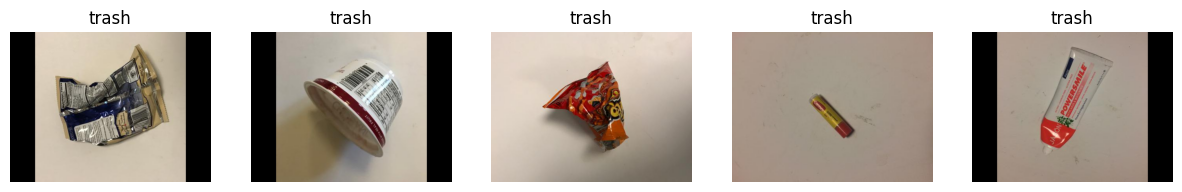

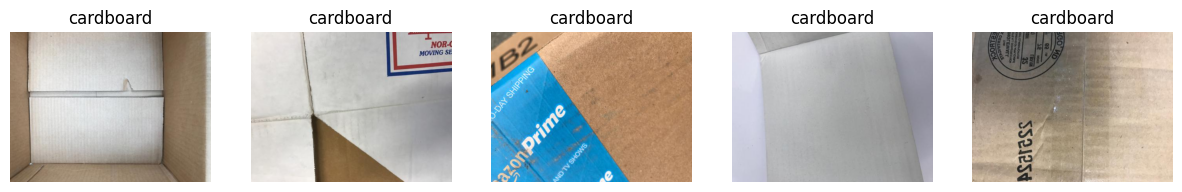

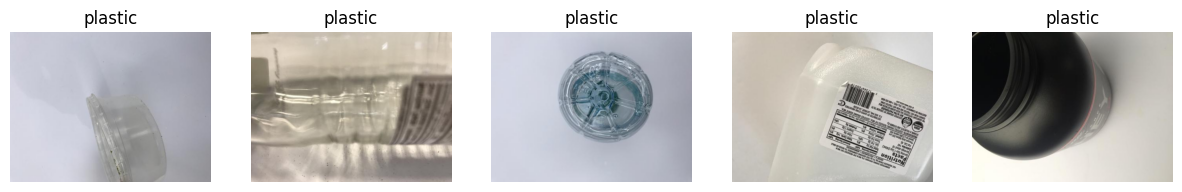

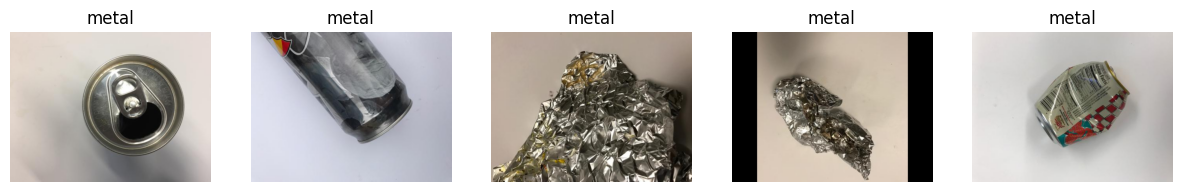

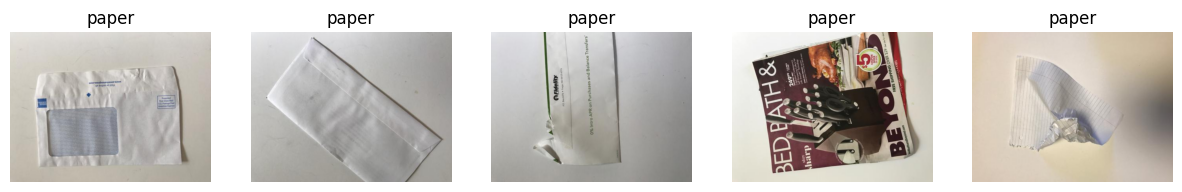

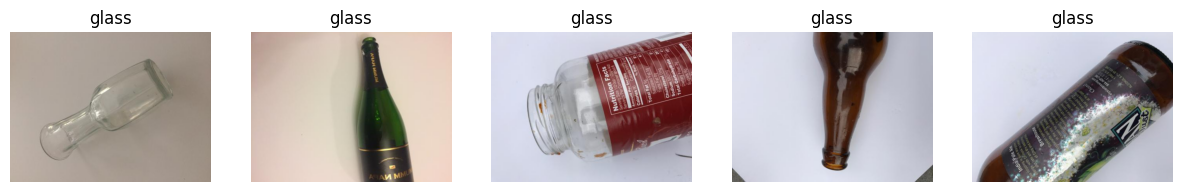

In [3]:
# 3. Mostrar ejemplos de imágenes
def mostrar_imagenes(path, clase, num_imagenes=5):
    clase_path = os.path.join(path, clase)
    imagenes = os.listdir(clase_path)[:num_imagenes]
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(imagenes):
        img_path = os.path.join(clase_path, img_name)
        img = Image.open(img_path)
        plt.subplot(1, num_imagenes, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(clase)
    plt.show()

# Mostrar imágenes de cada clase (muestra un ejemplo por clase)
for clase in distribucion.keys():
    mostrar_imagenes(dataset_path, clase)

In [4]:
# Importar bibliotecas necesarias
import os

# Ruta al dataset descargado
dataset_path = "Garbage classification"

# Función para contar imágenes por categoría
def contar_imagenes_por_categoria(path):
    clases = os.listdir(path)
    conteo_categorias = {}
    for clase in clases:
        clase_path = os.path.join(path, clase)
        if os.path.isdir(clase_path):  # Asegurarse de que sea un directorio
            num_imagenes = len([f for f in os.listdir(clase_path) if os.path.isfile(os.path.join(clase_path, f))])
            conteo_categorias[clase] = num_imagenes
    return conteo_categorias

# Obtener y mostrar el conteo
conteo = contar_imagenes_por_categoria(dataset_path)

# Mostrar el conteo en consola
print("Conteo de imágenes por categoría:")
for categoria, cantidad in conteo.items():
    print(f"{categoria}: {cantidad} imágenes")

Conteo de imágenes por categoría:
trash: 594 imágenes
cardboard: 594 imágenes
plastic: 594 imágenes
metal: 594 imágenes
paper: 594 imágenes
glass: 594 imágenes


Aumentando la clase 'trash' de 594 a 594 imágenes...
Aumentando la clase 'cardboard' de 594 a 594 imágenes...
Aumentando la clase 'plastic' de 594 a 594 imágenes...
Aumentando la clase 'metal' de 594 a 594 imágenes...
Aumentando la clase 'paper' de 594 a 594 imágenes...
Aumentando la clase 'glass' de 594 a 594 imágenes...

Nuevo conteo de imágenes por categoría después de la aumentación:
trash: 594 imágenes
cardboard: 594 imágenes
plastic: 594 imágenes
metal: 594 imágenes
paper: 594 imágenes
glass: 594 imágenes


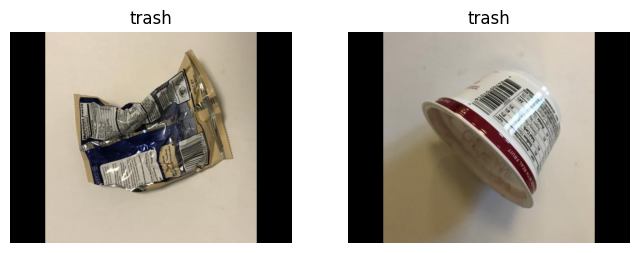

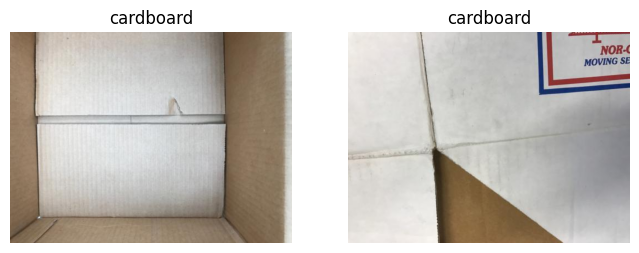

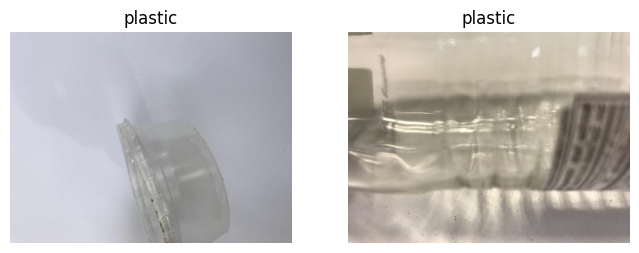

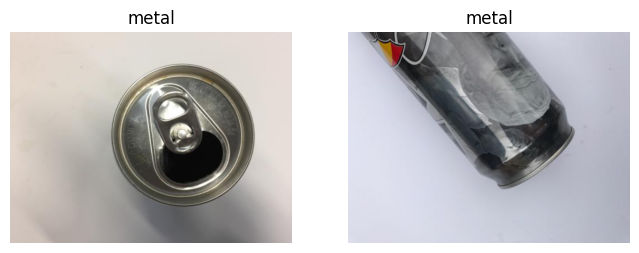

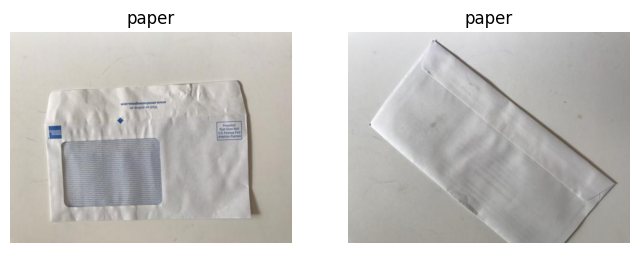

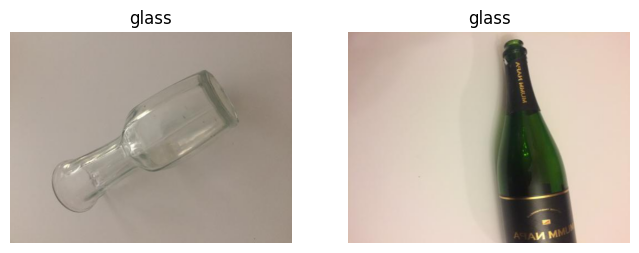

In [5]:
from PIL import Image, ImageOps
import random
import os

# Función para aumentar las imágenes en cada categoría
def aumentar_imagenes(dataset_path, max_images=594):
    clases = os.listdir(dataset_path)
    for clase in clases:
        clase_path = os.path.join(dataset_path, clase)
        if os.path.isdir(clase_path):
            imagenes = os.listdir(clase_path)
            num_actual = len(imagenes)
            print(f"Aumentando la clase '{clase}' de {num_actual} a {max_images} imágenes...")
            
            while num_actual < max_images:
                # Elegir una imagen al azar para aumentación
                img_name = random.choice(imagenes)
                img_path = os.path.join(clase_path, img_name)
                with Image.open(img_path) as img:
                    # Realizar transformaciones aleatorias
                    transformacion = random.choice(["flip", "rotate"])
                    if transformacion == "flip":
                        img_aumentada = ImageOps.mirror(img)
                    elif transformacion == "rotate":
                        img_aumentada = img.rotate(random.choice([90, 180, 270]))
                    
                    # Guardar la imagen aumentada
                    nueva_imagen_nombre = f"{clase}_{num_actual}.jpg"
                    nueva_imagen_path = os.path.join(clase_path, nueva_imagen_nombre)
                    img_aumentada.save(nueva_imagen_path)
                    
                    # Actualizar el contador
                    num_actual += 1

# Ruta del dataset
dataset_path = "Garbage classification"  # Cambia esto a tu ruta real

# Aumentar imágenes en todas las categorías
aumentar_imagenes(dataset_path)

# Verificar conteo después de la aumentación
conteo_post_aumentacion = contar_imagenes_por_categoria(dataset_path)

# Mostrar el nuevo conteo
print("\nNuevo conteo de imágenes por categoría después de la aumentación:")
for categoria, cantidad in conteo_post_aumentacion.items():
    print(f"{categoria}: {cantidad} imágenes")

# Mostrar 2 imágenes por categoría
def mostrar_dos_imagenes_por_categoria(path, categorias):
    for clase in categorias:
        clase_path = os.path.join(path, clase)
        imagenes = os.listdir(clase_path)[:2]
        plt.figure(figsize=(8, 4))
        for i, img_name in enumerate(imagenes):
            img_path = os.path.join(clase_path, img_name)
            img = Image.open(img_path)
            plt.subplot(1, 2, i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(clase)
        plt.show()

mostrar_dos_imagenes_por_categoria(dataset_path, conteo_post_aumentacion.keys())

# Etapa2

In [6]:
import os
from PIL import Image

# Ruta del dataset
dataset_path = "Garbage classification"  # Cambia esto a tu ruta real

# Ruta para guardar las imágenes redimensionadas
resized_dataset_path = "Garbage classification resized"
os.makedirs(resized_dataset_path, exist_ok=True)

# Redimensionar imágenes
def redimensionar_imagenes(input_path, output_path, target_size=(224, 224)):
    for root, dirs, files in os.walk(input_path):
        for dir_name in dirs:
            # Crear directorios de salida para cada categoría
            input_dir = os.path.join(root, dir_name)
            output_dir = os.path.join(output_path, dir_name)
            os.makedirs(output_dir, exist_ok=True)
            
            for file_name in os.listdir(input_dir):
                if file_name.endswith(('.png', '.jpg', '.jpeg')):
                    input_file_path = os.path.join(input_dir, file_name)
                    output_file_path = os.path.join(output_dir, file_name)
                    
                    # Redimensionar y guardar la imagen
                    with Image.open(input_file_path) as img:
                        img_resized = img.resize(target_size)
                        img_resized.save(output_file_path)

# Ejecutar la redimensión
redimensionar_imagenes(dataset_path, resized_dataset_path)

print(f"Imágenes redimensionadas y guardadas en: {resized_dataset_path}")


Imágenes redimensionadas y guardadas en: Garbage classification resized


In [7]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
import numpy as np
from PIL import Image
import os

# 1. Cargar el modelo preentrenado
model = EfficientNetB0(weights='imagenet')  # Modelo preentrenado
model.summary()  # Opcional: Ver la estructura del modelo

# 2. Función para cargar imágenes ya redimensionadas y aplicar preprocesamiento
def load_image(img_path):
    img = Image.open(img_path).convert('RGB')  # Asegurarse de que sea RGB
    img_array = np.array(img)  # Convertir a array numpy
    img_array = preprocess_input(img_array)  # Normalizar para EfficientNet
    return np.expand_dims(img_array, axis=0)  # Añadir dimensión de batch

# 3. Probar el modelo con imágenes redimensionadas
dataset_path = "Garbage classification resized"  # Cambia a la ruta redimensionada
categories = os.listdir(dataset_path)  # Obtener categorías

print("Probando el modelo en imágenes del dataset:")
for category in categories:
    category_path = os.path.join(dataset_path, category)
    images = [os.path.join(category_path, f) for f in os.listdir(category_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    
    # Probar las primeras 2 imágenes de cada categoría
    for img_path in images[:2]:
        input_tensor = load_image(img_path)  # Cargar y preprocesar imagen
        predictions = model.predict(input_tensor)  # Realizar predicción
        decoded_predictions = decode_predictions(predictions, top=3)[0]  # Decodificar las 3 mejores predicciones

        # Mostrar resultados
        print(f"\nImagen: {img_path}")
        for i, (class_id, class_name, confidence) in enumerate(decoded_predictions):
            print(f"  {i+1}. {class_name}: {confidence:.2f}")


2024-12-03 12:46:38.208168: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-03 12:46:38.208541: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 12:46:38.210344: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 12:46:38.214767: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733229998.222128   16024 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733229998.22

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 5,330,571 (20.33 MB)

 Trainable params: 5,288,548 (20.17 MB)

 Non-trainable params: 42,023 (164.16 KB)

Probando el modelo en imágenes del dataset:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step

Imagen: Garbage classification resized/trash/trash_478.jpg
  1. breastplate: 0.13
  2. buckle: 0.10
  3. holster: 0.07
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

Imagen: Garbage classification resized/trash/trash_515.jpg
  1. oil_filter: 0.40
  2. spotlight: 0.19
  3. thimble: 0.15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

Imagen: Garbage classification resized/cardboard/cardboard102.jpg
  1. wardrobe: 0.24
  2. refrigerator: 0.12
  3. shoji: 0.06
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

Imagen: Garbage classification resized/cardboard/cardboard100.jpg
  1. envelope: 0.39
  2. carton: 0.35
  3. packet: 0.01
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

Imagen: Garbage classification resized/plastic/plastic327.jpg
  1. nipple: 0.15
  2. spotlight: 0.06
  3. oxygen_mask: 0.05
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Imagen: Garbage classification resized/plastic/plastic_558.jpg
  1. beaker: 0.29
  2. Petri_dish: 0.12
  3. 

# Etapa 3

In [8]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Ruta al dataset
dataset_path = "Garbage classification resized"  # Cambia esto a tu ruta redimensionada

# Obtener todas las imágenes y sus etiquetas
def obtener_imagenes_y_etiquetas(path):
    data = []
    categories = os.listdir(path)
    for category in categories:
        category_path = os.path.join(path, category)
        if os.path.isdir(category_path):
            images = [os.path.join(category_path, img) for img in os.listdir(category_path) if img.endswith(('.png', '.jpg', '.jpeg'))]
            for img in images:
                data.append({"path": img, "label": category})
    return pd.DataFrame(data)

# Crear DataFrame de imágenes y etiquetas
df = obtener_imagenes_y_etiquetas(dataset_path)
print(f"Total de imágenes: {len(df)}")

# Dividir en train (80%) y test (20%)
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# Mostrar conteo de cada categoría en train y test
print("\nDistribución en train:")
print(train_df['label'].value_counts())
print("\nDistribución en test:")
print(test_df['label'].value_counts())

# Guardar los DataFrames en archivos CSV (opcional)
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

print("\nDivisión completada. Archivos guardados como 'train_data.csv' y 'test_data.csv'")


Total de imágenes: 3564

Distribución en train:
label
cardboard    476
trash        475
glass        475
plastic      475
metal        475
paper        475
Name: count, dtype: int64

Distribución en test:
label
plastic      119
metal        119
glass        119
trash        119
paper        119
cardboard    118
Name: count, dtype: int64

División completada. Archivos guardados como 'train_data.csv' y 'test_data.csv'


In [9]:
# Importar EfficientNetB0 para verificar el número de capas
from tensorflow.keras.applications import EfficientNetB0

# Cargar el modelo preentrenado
model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Número total de capas en EfficientNetB0
num_layers = len(model.layers)
num_layers
# Hemos visto que el modelo preentrenado tiene 238 capas y cogeremos solo las últimas 38 capas

238

Total de imágenes: 3564

Distribución en train:
label
cardboard    476
trash        475
glass        475
plastic      475
metal        475
paper        475
Name: count, dtype: int64

Distribución en test:
label
plastic      119
metal        119
glass        119
trash        119
paper        119
cardboard    118
Name: count, dtype: int64

División completada. Archivos guardados como 'train_data.csv' y 'test_data.csv'
Found 2851 validated image filenames belonging to 6 classes.
Found 713 validated image filenames belonging to 6 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │         7,686 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,057,257 (15.48 MB)

 Trainable params: 3,931,734 (15.00 MB)

 Non-trainable params: 125,523 (490.33 KB)

Epoch 1/35


/home/reboot-student/anaconda3/envs/data_analysis/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/178 ━━━━━━━━━━━━━━━━━━━━ 67s 312ms/step - accuracy: 0.3001 - loss: 1.7047 - val_accuracy: 0.1662 - val_loss: 2.9775
Epoch 2/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3125 - loss: 1.7041 - val_accuracy: 0.2222 - val_loss: 2.6788
Epoch 3/35


/home/reboot-student/anaconda3/envs/data_analysis/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-12-03 12:53:47.481796: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 55s 307ms/step - accuracy: 0.4683 - loss: 1.3694 - val_accuracy: 0.2358 - val_loss: 2.6521
Epoch 4/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.6250 - loss: 1.0936 - val_accuracy: 0.2222 - val_loss: 2.1100
Epoch 5/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 55s 307ms/step - accuracy: 0.5371 - loss: 1.2365 - val_accuracy: 0.1719 - val_loss: 2.7501
Epoch 6/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.6875 - loss: 1.0856 - val_accuracy: 0.0000e+00 - val_loss: 3.1563
Epoch 7/35


2024-12-03 12:55:37.660514: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 55s 310ms/step - accuracy: 0.5868 - loss: 1.0945 - val_accuracy: 0.2585 - val_loss: 2.8277
Epoch 8/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.6875 - loss: 0.8739 - val_accuracy: 0.2222 - val_loss: 3.2252
Epoch 9/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 55s 307ms/step - accuracy: 0.6358 - loss: 1.0103 - val_accuracy: 0.1832 - val_loss: 2.9634
Epoch 10/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.5625 - loss: 1.0366 - val_accuracy: 0.1111 - val_loss: 1.9297
Epoch 11/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 55s 309ms/step - accuracy: 0.6467 - loss: 0.9429 - val_accuracy: 0.1747 - val_loss: 2.3022
Epoch 12/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.8750 - loss: 0.4471 - val_accuracy: 0.3333 - val_loss: 1.7719
Epoch 13/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 55s 308ms/step - accuracy: 0.6825 - loss: 0.8932 - val_accuracy: 0.3750 - val_loss: 1.9237
Epoch 14/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.8750 - loss: 0.5276 - va

2024-12-03 12:59:19.064180: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 55s 307ms/step - accuracy: 0.6853 - loss: 0.8604 - val_accuracy: 0.2926 - val_loss: 3.1219
Epoch 16/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.6875 - loss: 0.6906 - val_accuracy: 0.2222 - val_loss: 3.8399
Epoch 17/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 55s 309ms/step - accuracy: 0.7097 - loss: 0.7649 - val_accuracy: 0.2088 - val_loss: 2.3988
Epoch 18/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.8750 - loss: 0.2934 - val_accuracy: 0.2222 - val_loss: 1.9678
Epoch 19/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 55s 307ms/step - accuracy: 0.7254 - loss: 0.7374 - val_accuracy: 0.4148 - val_loss: 1.8771
Epoch 20/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 41s 232ms/step - accuracy: 0.6875 - loss: 0.5677 - val_accuracy: 0.6667 - val_loss: 1.6319
Epoch 21/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 53s 298ms/step - accuracy: 0.7532 - loss: 0.6696 - val_accuracy: 0.1903 - val_loss: 1.7395
Epoch 22/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.6875 - loss: 0.8048 -

2024-12-03 13:07:19.459961: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 54s 304ms/step - accuracy: 0.8113 - loss: 0.5165 - val_accuracy: 0.5057 - val_loss: 2.0292
Epoch 32/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.9375 - loss: 0.2653 - val_accuracy: 0.2222 - val_loss: 3.9136
Epoch 33/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 54s 303ms/step - accuracy: 0.8273 - loss: 0.4993 - val_accuracy: 0.3580 - val_loss: 1.5697
Epoch 34/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.6250 - loss: 0.7365 - val_accuracy: 0.4444 - val_loss: 1.4414
Epoch 35/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 54s 304ms/step - accuracy: 0.8232 - loss: 0.4918 - val_accuracy: 0.2955 - val_loss: 2.1043


Modelo entrenado y guardado como 'garbage_classifier_efficientnet_updated.h5'


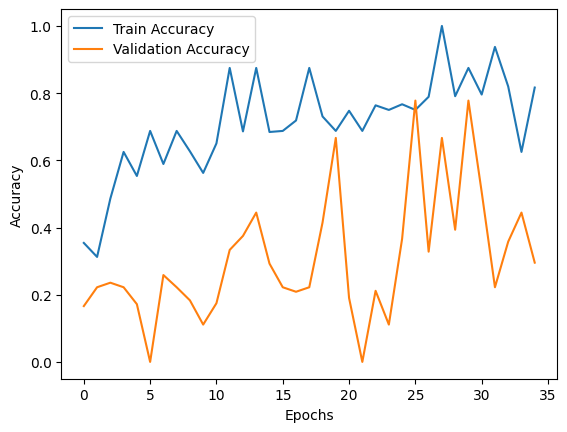

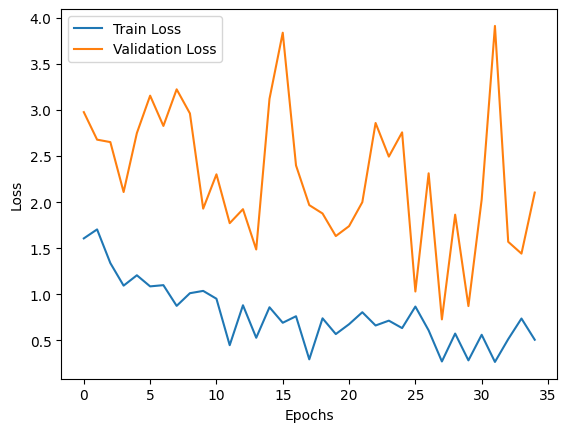

In [12]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Configuraciones
BATCH_SIZE = 16
IMG_SIZE = (224, 224)
EPOCHS = 35
LEARNING_RATE = 0.001
dataset_path = "Garbage classification resized"  # Cambia esto a tu ruta redimensionada

# 1. Obtener imágenes y etiquetas
def obtener_imagenes_y_etiquetas(path):
    data = []
    categories = os.listdir(path)
    for category in categories:
        category_path = os.path.join(path, category)
        if os.path.isdir(category_path):
            images = [os.path.join(category_path, img) for img in os.listdir(category_path) if img.endswith(('.png', '.jpg', '.jpeg'))]
            for img in images:
                data.append({"path": img, "label": category})
    return pd.DataFrame(data)

# Crear DataFrame de imágenes y etiquetas
df = obtener_imagenes_y_etiquetas(dataset_path)
print(f"Total de imágenes: {len(df)}")

# 2. Dividir en train (80%) y test (20%)
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# Mostrar conteo de cada categoría en train y test
print("\nDistribución en train:")
print(train_df['label'].value_counts())
print("\nDistribución en test:")
print(test_df['label'].value_counts())

# Guardar los DataFrames en archivos CSV
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)
print("\nDivisión completada. Archivos guardados como 'train_data.csv' y 'test_data.csv'")

# 3. Preparar generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="path",
    y_col="label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="path",
    y_col="label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# 4. Construir el modelo
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Descongelar más capas
for layer in base_model.layers[:-150]:  # Congelar menos capas (ajustar según los datos)
    layer.trainable = False

# Añadir capas superiores personalizadas
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')  # Cambiar 6 por el número de categorías
])

# Resumen del modelo
model.summary()

# 5. Compilar el modelo
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 6. Entrenar el modelo
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=EPOCHS,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=test_generator.samples // BATCH_SIZE,
)

# Guardar el modelo entrenado
model.save("garbage_classifier_efficientnet_updated.h5")
print("Modelo entrenado y guardado como 'garbage_classifier_efficientnet_updated.h5'")

# 7. Graficar resultados (opcional)
import matplotlib.pyplot as plt

# Gráfica de precisión
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Gráfica de pérdida
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()